In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
data = pd.read_csv('4m_61f_all.csv')
data.head()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,17,0.000,780,44194,0.0,60,28920,26400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
1,17,0.001,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
2,17,0.002,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
3,17,0.000,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
4,17,0.001,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,DDOS


In [59]:
x = data["NewLabel"].value_counts()
print(x)

Normal            2403724
DDOS               611405
BruteForce         475321
Infiltration       268064
DoS                183477
MalwareActivty      91561
Name: NewLabel, dtype: int64


In [60]:
newLabel = data.iloc[:, -1:]
#Label Encoding for NewLabel column
from sklearn import preprocessing
newLabel_le = newLabel.apply(preprocessing.LabelEncoder().fit_transform)
newLabel_le.head()

,NewLabel
0,1
1,1
2,1
3,1
4,1


In [61]:
new_data = pd.concat([data.iloc[:, :-1],newLabel_le], axis=1)
new_data.head()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,17,0.000,780,44194,0.0,60,28920,26400,0,0,...,0,0,0,0,0,0,0,0,0,1
1,17,0.001,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17,0.002,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,1
3,17,0.000,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,0.001,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
#Reduce data
data_minimal = new_data.sample(n = 100)
data_minimal

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
986715,6,2.628,51402,21,1.000,9,628,26,6,480,...,0,0,14,5,0,2,2,74,74,0
1100411,17,28812.336,18518,80,188.000,97214,7193836,3110848,0,0,...,0,0,0,0,0,0,0,0,0,1
564790,17,0.595,16438,46969,0.000,4,503,335,4,830,...,0,0,0,0,0,0,0,0,0,0
1236377,17,2128.245,35478,22,0.000,602,44548,19264,0,0,...,0,0,0,0,0,0,0,0,0,1
1282493,17,1084.093,21534,22,0.000,16,1184,512,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045385,6,5.267,43467,3389,88.000,10,1696,1144,7,1971,...,2,0,16,10,1,2,0,66,66,5
2761579,6,2.690,57999,3389,88.000,8,1576,1132,7,1971,...,2,0,14,10,1,2,0,66,66,5
1229103,17,2103.880,12551,22,0.000,625,46250,20000,0,0,...,0,0,0,0,0,0,0,0,0,1
59509,1,81.868,0,0,81.178,3,306,180,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
x = data_minimal.iloc[:,:-1]
y = data_minimal.iloc[:,-1:]

In [64]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [65]:
# XGBoost Classification Feature Importance
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[13:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.07561
Feature: 2, Score: 0.01514
Feature: 3, Score: 0.09777
Feature: 4, Score: 0.01659
Feature: 5, Score: 0.00671
Feature: 6, Score: 0.03179
Feature: 7, Score: 0.03938
Feature: 8, Score: 0.08716
Feature: 9, Score: 0.06009
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.01888
Feature: 12, Score: 0.02474
Feature: 13, Score: 0.00350
Feature: 14, Score: 0.00891
Feature: 15, Score: 0.03457
Feature: 16, Score: 0.01489
Feature: 17, Score: 0.01001
Feature: 18, Score: 0.00239
Feature: 19, Score: 0.00236
Feature: 20, Score: 0.00460
Feature: 21, Score: 0.02063
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.01478
Feature: 24, Score: 0.02299

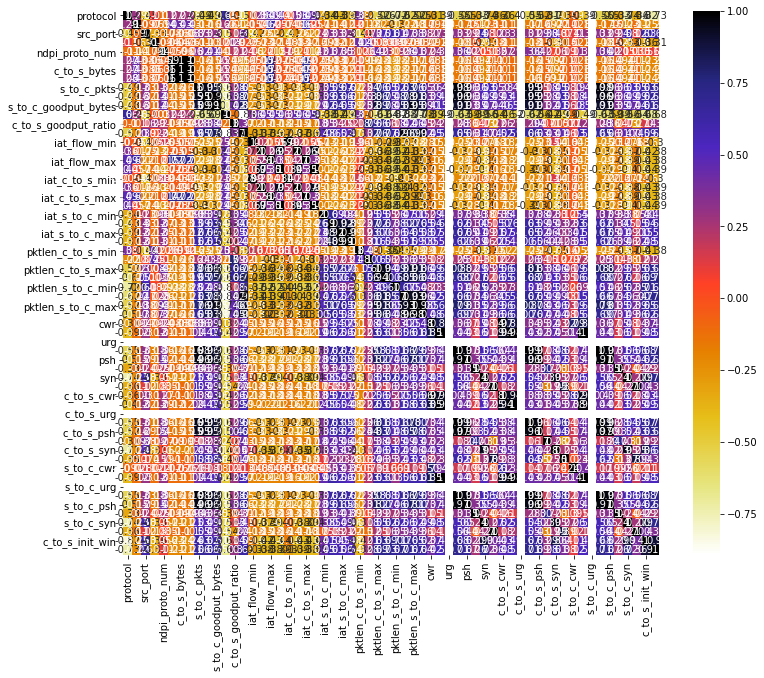

In [66]:
#Colleration matrix 
import seaborn as sns 
plt.figure(figsize = (12,10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [67]:
X_train.corr()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_cwr,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win
protocol,1.000000,0.294393,-0.450164,0.113748,-0.111142,0.274380,0.274884,0.275574,-0.494289,-0.488152,...,-0.091038,-0.393444,NaN,-0.549715,-0.497434,-0.326242,-0.737081,-0.355818,-0.817786,-0.729337
duration,0.294393,1.000000,-0.096592,-0.068847,-0.138664,0.433714,0.433657,0.433585,-0.169316,-0.161858,...,-0.028014,-0.121115,NaN,-0.169287,-0.153201,-0.100490,-0.226980,-0.109531,-0.251847,-0.224607
src_port,-0.450164,-0.096592,1.000000,-0.330289,-0.172966,-0.085593,-0.086148,-0.086889,0.329596,0.319243,...,0.114237,0.296789,NaN,0.325269,0.287541,0.238523,0.579339,0.124008,0.626407,0.599862
dst_port,0.113748,-0.068847,-0.330289,1.000000,-0.093823,-0.063826,-0.062601,-0.060973,-0.112025,-0.125414,...,-0.021758,-0.118804,NaN,-0.181127,-0.151558,-0.025026,-0.325381,-0.182154,-0.359763,-0.313379
ndpi_proto_num,-0.111142,-0.138664,-0.172966,-0.093823,1.000000,-0.059454,-0.059740,-0.060141,0.321440,0.411128,...,0.110433,0.312198,NaN,0.357483,0.417052,0.213830,0.050662,0.035187,0.055958,0.112076
c_to_s_pkts,0.274380,0.433714,-0.085593,-0.063826,-0.059454,1.000000,0.999996,0.999977,-0.157673,-0.150711,...,-0.026109,-0.112864,NaN,-0.157643,-0.142642,-0.093597,-0.211473,-0.102051,-0.234621,-0.209234
c_to_s_bytes,0.274884,0.433657,-0.086148,-0.062601,-0.059740,0.999996,1.000000,0.999993,-0.157873,-0.150886,...,-0.026134,-0.113018,NaN,-0.157838,-0.142798,-0.093754,-0.211842,-0.102225,-0.235024,-0.209572
c_to_s_goodput_bytes,0.275574,0.433585,-0.086889,-0.060973,-0.060141,0.999977,0.999993,1.000000,-0.158212,-0.151185,...,-0.026174,-0.113236,NaN,-0.158170,-0.143076,-0.093981,-0.212359,-0.102502,-0.235594,-0.210057
s_to_c_pkts,-0.494289,-0.169316,0.329596,-0.112025,0.321440,-0.157673,-0.157873,-0.158212,1.000000,0.948825,...,0.193452,0.402651,NaN,0.977093,0.956679,0.360631,0.526924,0.554426,0.626808,0.660690
s_to_c_bytes,-0.488152,-0.161858,0.319243,-0.125414,0.411128,-0.150711,-0.150886,-0.151185,0.948825,1.000000,...,0.181381,0.466122,NaN,0.955705,0.963705,0.361634,0.492123,0.489053,0.624057,0.662171


In [68]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [69]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

35

In [70]:
corr_features

{'ack',
 'c_to_s_ack',
 'c_to_s_bytes',
 'c_to_s_cwr',
 'c_to_s_ece',
 'c_to_s_fin',
 'c_to_s_goodput_bytes',
 'c_to_s_init_win',
 'c_to_s_psh',
 'c_to_s_syn',
 'ece',
 'iat_c_to_s_avg',
 'iat_c_to_s_max',
 'iat_c_to_s_min',
 'iat_c_to_s_stddev',
 'iat_flow_stddev',
 'iat_s_to_c_max',
 'iat_s_to_c_stddev',
 'pktlen_c_to_s_max',
 'pktlen_c_to_s_stddev',
 'pktlen_s_to_c_avg',
 'pktlen_s_to_c_max',
 'pktlen_s_to_c_min',
 'pktlen_s_to_c_stddev',
 'psh',
 's_to_c_ack',
 's_to_c_bytes',
 's_to_c_ece',
 's_to_c_fin',
 's_to_c_goodput_bytes',
 's_to_c_goodput_ratio',
 's_to_c_init_win',
 's_to_c_psh',
 's_to_c_rst',
 's_to_c_syn'}

In [71]:
X_train_drop = X_train.drop(corr_features, axis = 1)
X_test_drop = X_test.drop(corr_features, axis = 1)
X_train_drop

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,s_to_c_pkts,data_ratio,c_to_s_goodput_ratio,iat_flow_min,...,pktlen_c_to_s_avg,cwr,urg,rst,syn,fin,c_to_s_urg,c_to_s_rst,s_to_c_cwr,s_to_c_urg
3226168,6,1.556,51248,3389,88.00,9,7,-0.096,69.3,1,...,180.7,0,0,1,2,0,0,1,0,0
752781,6,6.006,52967,80,7.22,7,3,0.619,47.0,5,...,112.9,0,0,0,5,0,0,0,0,0
2761579,6,2.690,57999,3389,88.00,8,7,-0.111,71.8,1,...,197.0,1,0,1,2,0,0,1,0,0
2370012,6,1.700,43695,3389,88.00,10,8,-0.031,73.0,1,...,204.4,1,0,0,2,1,0,0,0,0
345323,6,0.704,56925,80,7.00,4,3,0.562,65.5,351,...,165.8,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561076,6,0.337,56270,80,7.00,3,1,0.699,50.1,14,...,116.7,0,0,0,2,0,0,0,0,0
2453717,6,3.983,34721,3389,88.00,14,10,-0.012,65.5,2,...,159.1,1,0,0,2,1,0,0,0,0
1867655,6,0.016,49196,443,91.00,2,2,-0.282,0.0,16,...,54.0,0,0,1,0,2,0,1,0,0
445653,6,0.136,61349,80,7.00,3,1,0.707,51.1,135,...,116.3,0,0,0,2,0,0,0,0,0


In [72]:
# XGBoost Classification Feature Importance
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train_drop, y_train)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

[13:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.07647
Feature: 2, Score: 0.02161
Feature: 3, Score: 0.14650
Feature: 4, Score: 0.02365
Feature: 5, Score: 0.02503
Feature: 6, Score: 0.11737
Feature: 7, Score: 0.03489
Feature: 8, Score: 0.04767
Feature: 9, Score: 0.01605
Feature: 10, Score: 0.03077
Feature: 11, Score: 0.02297
Feature: 12, Score: 0.11602
Feature: 13, Score: 0.03150
Feature: 14, Score: 0.00942
Feature: 15, Score: 0.03182
Feature: 16, Score: 0.10552
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00837
Feature: 19, Score: 0.03511
Feature: 20, Score: 0.09928
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000

C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


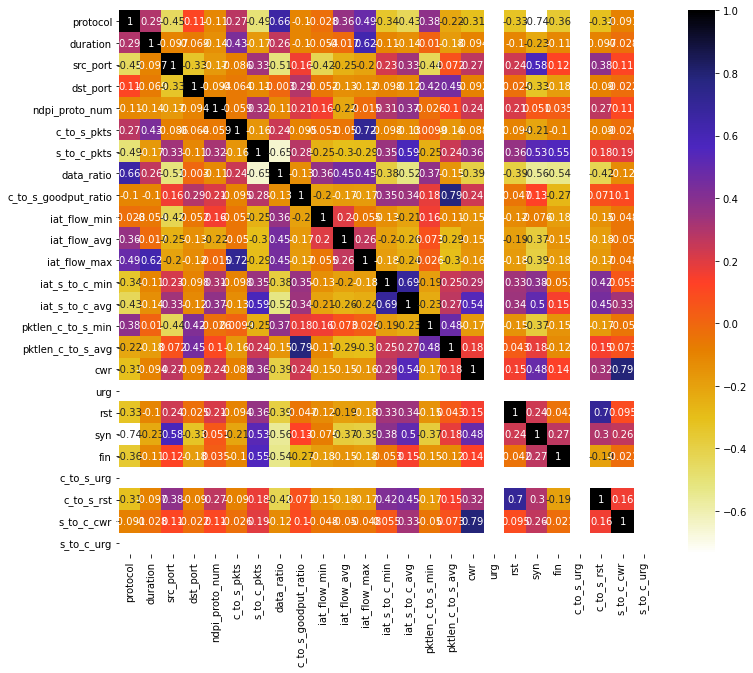

In [73]:
#Colleration matrix 
import seaborn as sns 
plt.figure(figsize = (12,10))
cor = X_train_drop.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [74]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [75]:
corr_features = correlation(X_train_drop, 0.7)
len(set(corr_features))

5

In [76]:
corr_features

{'c_to_s_rst', 'iat_flow_max', 'pktlen_c_to_s_avg', 's_to_c_cwr', 'syn'}

In [77]:
X_train_final = X_train_drop.drop(corr_features, axis = 1)
X_test_final = X_test_drop.drop(corr_features, axis = 1)

In [78]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
rfc = RandomForestClassifier(n_estimators=200, random_state=1)
abc = AdaBoostClassifier(n_estimators=200, random_state= 1, learning_rate=0.01)
gbc = GradientBoostingClassifier(n_estimators=200, random_state=1, learning_rate=0.01)
xgb_clf = xgb.XGBClassifier(n_estimators=200, learning_rate=0.01, random_state=1)

In [79]:
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

<ipython-input-79-c1c3237b1b54>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option

[13:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
# Accuracy
print('Random Forest: ', rfc.score(X_test, y_test))
print('AdaBoost: ', abc.score(X_test, y_test))
print('Gradient Boost: ', gbc.score(X_test, y_test))
print('XGBoost: ', xgb_clf.score(X_test, y_test))

Random Forest:  0.88
AdaBoost:  0.92
Gradient Boost:  0.8
XGBoost:  0.88
